### In this project we are going to anlyze my spotify musics and gain some information about those musics.


First Adding the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode(connected=True)


In [ ]:
## read the data our database 
data = pd.read_csv("merged_file_with_genre_compiled_version.csv")
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,valence,tempo,time_signature,genres,uri,lyrics,artists_name_x,endTime,artists_name_y,msPlayed
0,5jwaQxnzruRh67P955KGAl,Séduction,0,194667,0,['M. Malloire'],['3K6cSaSB2IOwC45lccxZkB'],1928,0.444,0.328,...,0.442,130.595,3,[''],spotify:track:3nZNrLcULGn4EEUyHGcQwY,\r\n\r\nUn p'tit bout de ta peau coincé entre ...,Joanna,2022-04-05 08:51,René Aubry,281666
1,5jwaQxnzruRh67P955KGAl,Séduction,0,194667,0,['M. Malloire'],['3K6cSaSB2IOwC45lccxZkB'],1928,0.444,0.328,...,0.442,130.595,3,[''],spotify:track:3nZNrLcULGn4EEUyHGcQwY,\r\n\r\nUn p'tit bout de ta peau coincé entre ...,Joanna,2022-04-11 09:39,René Aubry,281666
2,5jwaQxnzruRh67P955KGAl,Séduction,0,194667,0,['M. Malloire'],['3K6cSaSB2IOwC45lccxZkB'],1928,0.444,0.328,...,0.442,130.595,3,[''],spotify:track:3nZNrLcULGn4EEUyHGcQwY,\r\n\r\nUn p'tit bout de ta peau coincé entre ...,Joanna,2022-04-17 09:49,René Aubry,162472
3,5jwaQxnzruRh67P955KGAl,Séduction,0,194667,0,['M. Malloire'],['3K6cSaSB2IOwC45lccxZkB'],1928,0.444,0.328,...,0.442,130.595,3,[''],spotify:track:3nZNrLcULGn4EEUyHGcQwY,\r\n\r\nUn p'tit bout de ta peau coincé entre ...,Joanna,2022-04-21 10:38,René Aubry,281666
4,5jwaQxnzruRh67P955KGAl,Séduction,0,194667,0,['M. Malloire'],['3K6cSaSB2IOwC45lccxZkB'],1928,0.444,0.328,...,0.442,130.595,3,[''],spotify:track:3nZNrLcULGn4EEUyHGcQwY,\r\n\r\nUn p'tit bout de ta peau coincé entre ...,Joanna,2022-04-27 11:32,René Aubry,281666


As we can see same song has been played but in different time : so first we should group our data by the ID of songs 

In [3]:
# count the number of duplicates and add the count in front of each value
data['repeated'] = data.groupby('id')['id'].transform('size')

# drop the duplicates
distinct_musics = data.drop_duplicates(subset='id')

# sort the values by count in descending order
distinct_musics = distinct_musics.sort_values(by='repeated', ascending=False)

# reset the index
distinct_musics = distinct_musics.reset_index(drop=True)

# display the final result
distinct_musics


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,tempo,time_signature,genres,uri,lyrics,artists_name_x,endTime,artists_name_y,msPlayed,repeated
0,6xez71zpAqQ6N5i8E1jHlD,Carmina Burana: O Fortuna,45,144360,0,"['Carl Orff', 'Cleveland Orchestra', 'Michael ...","['4LXxsm5BF85PWnQ1dUDAze', '0jJszR81GjA87jeRq0...",1975,0.287,0.1580,...,148.645,3,[''],spotify:track:6xez71zpAqQ6N5i8E1jHlD,\r\nInstrumental\r\n,NaN,2022-06-12 06:40,Carl Orff,141531,20
1,6WDAtzaXY7d31CkuoxYFcb,Feather,56,293787,0,['Little Dragon'],['6Tyzp9KzpiZ04DABQoedps'],2009-08-17,0.663,0.8310,...,96.666,4,[''],spotify:track:7LDtzx34HGOhCHidhyLZGP,-99,Noon2Nine,2022-03-23 13:29,Dirk Maassen,281000,19
2,7sXTcibuNYugjjYNfgf2kY,Felicità,63,193160,0,['Al Bano And Romina Power'],['1c0wBsDBu0NqpvxBqjYjZS'],1982,0.710,0.6250,...,107.618,4,['classic italian pop'],spotify:track:7sXTcibuNYugjjYNfgf2kY,\r\n\r\nHo sbagliato tante volte nella vita\r\...,Al Bano And Romina Power,2022-04-17 18:44,Al Bano And Romina Power,193160,17
3,1YYhDizHx7PnDhAhko6cDS,"Take Me Home, Country Roads",71,190160,0,['John Denver'],['7EK1bQADBoqbYXnT4Cqv9w'],1971,0.462,0.3950,...,82.259,4,"['chamber pop', 'folk-pop', 'freak folk', 'ind...",spotify:track:2UJ9eh4cex6ulccBrskJXd,\r\nIn the middle of everything I started to s...,Mountain Man,2022-04-06 05:48,Mountain Man,212212,17
4,2uQ4px5SPONsgcUpulywIQ,Amsterdam,56,319360,0,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],2002-08-08,0.269,0.1760,...,78.861,4,"['alternative pop rock', 'modern alternative r...",spotify:track:454I78HEySdcHE8fcVabTb,\r\n\r\nPeople don't know much\r\nNeed a whisk...,Nothing But Thieves,2022-04-21 22:50,Jacques Brel,171445,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,4sxgLUEKTZEoYLfvK4wcTX,Lament,10,197840,0,['Yma Sumac'],['1HkQ4XrPffqcVW0TgTTw0d'],1952-05-01,0.209,0.2780,...,78.043,4,[''],spotify:track:6Ycd652t94EhfqkimmlJfL,\r\n\r\nYou say You're near to the broken\r\nY...,NaN,2023-03-04 13:45,Invadable Harmony,120884,1
118,79FPdsekcDp7RWK1IzClbr,Human,46,265293,0,['The Human League'],['1aX2dmV8XoHYCOQRxjPESG'],1986-01-01,0.622,0.4450,...,101.366,4,[''],spotify:track:4lSf3V7o1cwWn3mbRBZikd,"\r\n\r\nIn and out, counting hours, rocketing ...",NaN,2022-10-28 16:41,Leyton Stills,104101,1
119,4VI8nePiMEsnSgw2vmTh7f,Stories,31,165960,0,['Bill Withers'],['1ThoqLcyIYvZn7iWbj8fsj'],1974-08-08,0.376,0.1290,...,139.455,3,[''],spotify:track:5re3c22M1lc9PhJyfpDMDX,"\r\n\r\nOne, two, three, here we go\r\nOne, tw...",The Chakachas,2023-03-04 14:01,Danilo Stankovic,96025,1
120,0GivHTRVknYqgAuSDaV9wO,The Swan,13,164600,0,"['Camille Saint-Saëns', 'Pablo Casals']","['436sYg6CZhNefQJogaXeK0', '42ZCvzken6DllCB1xg...",1952,0.182,0.1230,...,74.716,4,['focus'],spotify:track:4gnse1wE1sdaO1LNqyDVCo,-99,Tomasz Kraal,2023-03-04 13:09,Camille Saint-Saëns,174333,1


One important thing is that since spotify didn't provide me with all features of my musics I had to join my data with another table I found in Kaggle but That dataset didn't have all my musics so it is expected that some proportion of my data was not included.

So we have `122` distinct musics in my playlists now let's dive into our data and grasp some information about it

In [4]:
## Let's check the 
display(data.info('all'))
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                636 non-null    object 
 1   name              636 non-null    object 
 2   popularity        636 non-null    int64  
 3   duration_ms       636 non-null    int64  
 4   explicit          636 non-null    int64  
 5   artists           636 non-null    object 
 6   id_artists        636 non-null    object 
 7   release_date      636 non-null    object 
 8   danceability      636 non-null    float64
 9   energy            636 non-null    float64
 10  key               636 non-null    int64  
 11  loudness          636 non-null    float64
 12  mode              636 non-null    int64  
 13  speechiness       636 non-null    float64
 14  acousticness      636 non-null    float64
 15  instrumentalness  636 non-null    float64
 16  liveness          636 non-null    float64
 1

None

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'genres', 'uri',
       'lyrics', 'artists_name_x', 'endTime', 'artists_name_y', 'msPlayed',
       'repeated'],
      dtype='object')

In [5]:
# release_date_ should be date so we change its type :
data['release_date'] = pd.to_datetime(data['release_date'])

## Also the time in duration can be in minutes for better understanding
data['duration_ms'] = data['duration_ms'] / 60000


In [7]:
data.describe()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,msPlayed,repeated
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,45.047170,4.320315,0.036164,0.476368,0.407828,5.150943,-13.507981,0.657233,0.051194,0.540794,0.306160,0.158147,0.385745,115.359758,3.660377,186535.668239,10.330189
std,21.918984,3.363592,0.186844,0.182080,0.282704,3.497020,7.574843,0.475008,0.047172,0.378595,0.388690,0.125951,0.265710,26.924429,0.728110,98944.450987,5.450805
min,0.000000,0.695117,0.000000,0.064200,0.002690,0.000000,-39.307000,0.000000,0.026100,0.000081,0.000000,0.027100,0.030200,50.960000,1.000000,0.000000,1.000000
25%,30.750000,3.061133,0.000000,0.300250,0.158000,2.000000,-16.705000,0.000000,0.032500,0.119000,0.000006,0.094400,0.142000,94.912250,3.000000,129867.000000,6.000000
50%,51.000000,3.426217,0.000000,0.483000,0.362000,5.000000,-11.218000,1.000000,0.040200,0.556000,0.011000,0.110000,0.355000,117.053000,4.000000,183533.000000,10.000000
75%,59.000000,4.896450,0.000000,0.610000,0.654000,9.000000,-8.409250,1.000000,0.049300,0.932000,0.733000,0.164000,0.625000,138.007000,4.000000,257533.000000,15.000000
max,85.000000,23.540850,1.000000,0.921000,0.992000,11.000000,-3.093000,1.000000,0.365000,0.996000,0.991000,0.743000,0.964000,182.500000,5.000000,537426.000000,20.000000


In [8]:
data.shape

(636, 28)

In [9]:
data.isnull().sum()


id                    0
name                  0
popularity            0
duration_ms           0
explicit              0
artists               0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
genres                0
uri                   0
lyrics                0
artists_name_x      138
endTime               0
artists_name_y        0
msPlayed              0
repeated              0
dtype: int64

It seems all the columns have data and the data types are correct. so let's do some EDA on our data 

In [10]:
## First I'm going to get the numeric values for the histograms
numeric_data = data._get_numeric_data()
numeric_data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,msPlayed,repeated
0,0,3.24445,0,0.444,0.328,5,-12.085,1,0.0466,0.883,0.00002,0.31,0.442,130.595,3,281666,9
1,0,3.24445,0,0.444,0.328,5,-12.085,1,0.0466,0.883,0.00002,0.31,0.442,130.595,3,281666,9
2,0,3.24445,0,0.444,0.328,5,-12.085,1,0.0466,0.883,0.00002,0.31,0.442,130.595,3,162472,9
3,0,3.24445,0,0.444,0.328,5,-12.085,1,0.0466,0.883,0.00002,0.31,0.442,130.595,3,281666,9
4,0,3.24445,0,0.444,0.328,5,-12.085,1,0.0466,0.883,0.00002,0.31,0.442,130.595,3,281666,9


array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>,
        <AxesSubplot: title={'center': 'explicit'}>,
        <AxesSubplot: title={'center': 'danceability'}>],
       [<AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'mode'}>],
       [<AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>],
       [<AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: title={'center': 'msPlayed'}>],
       [<AxesSubplot: title={'center': 'repeated'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

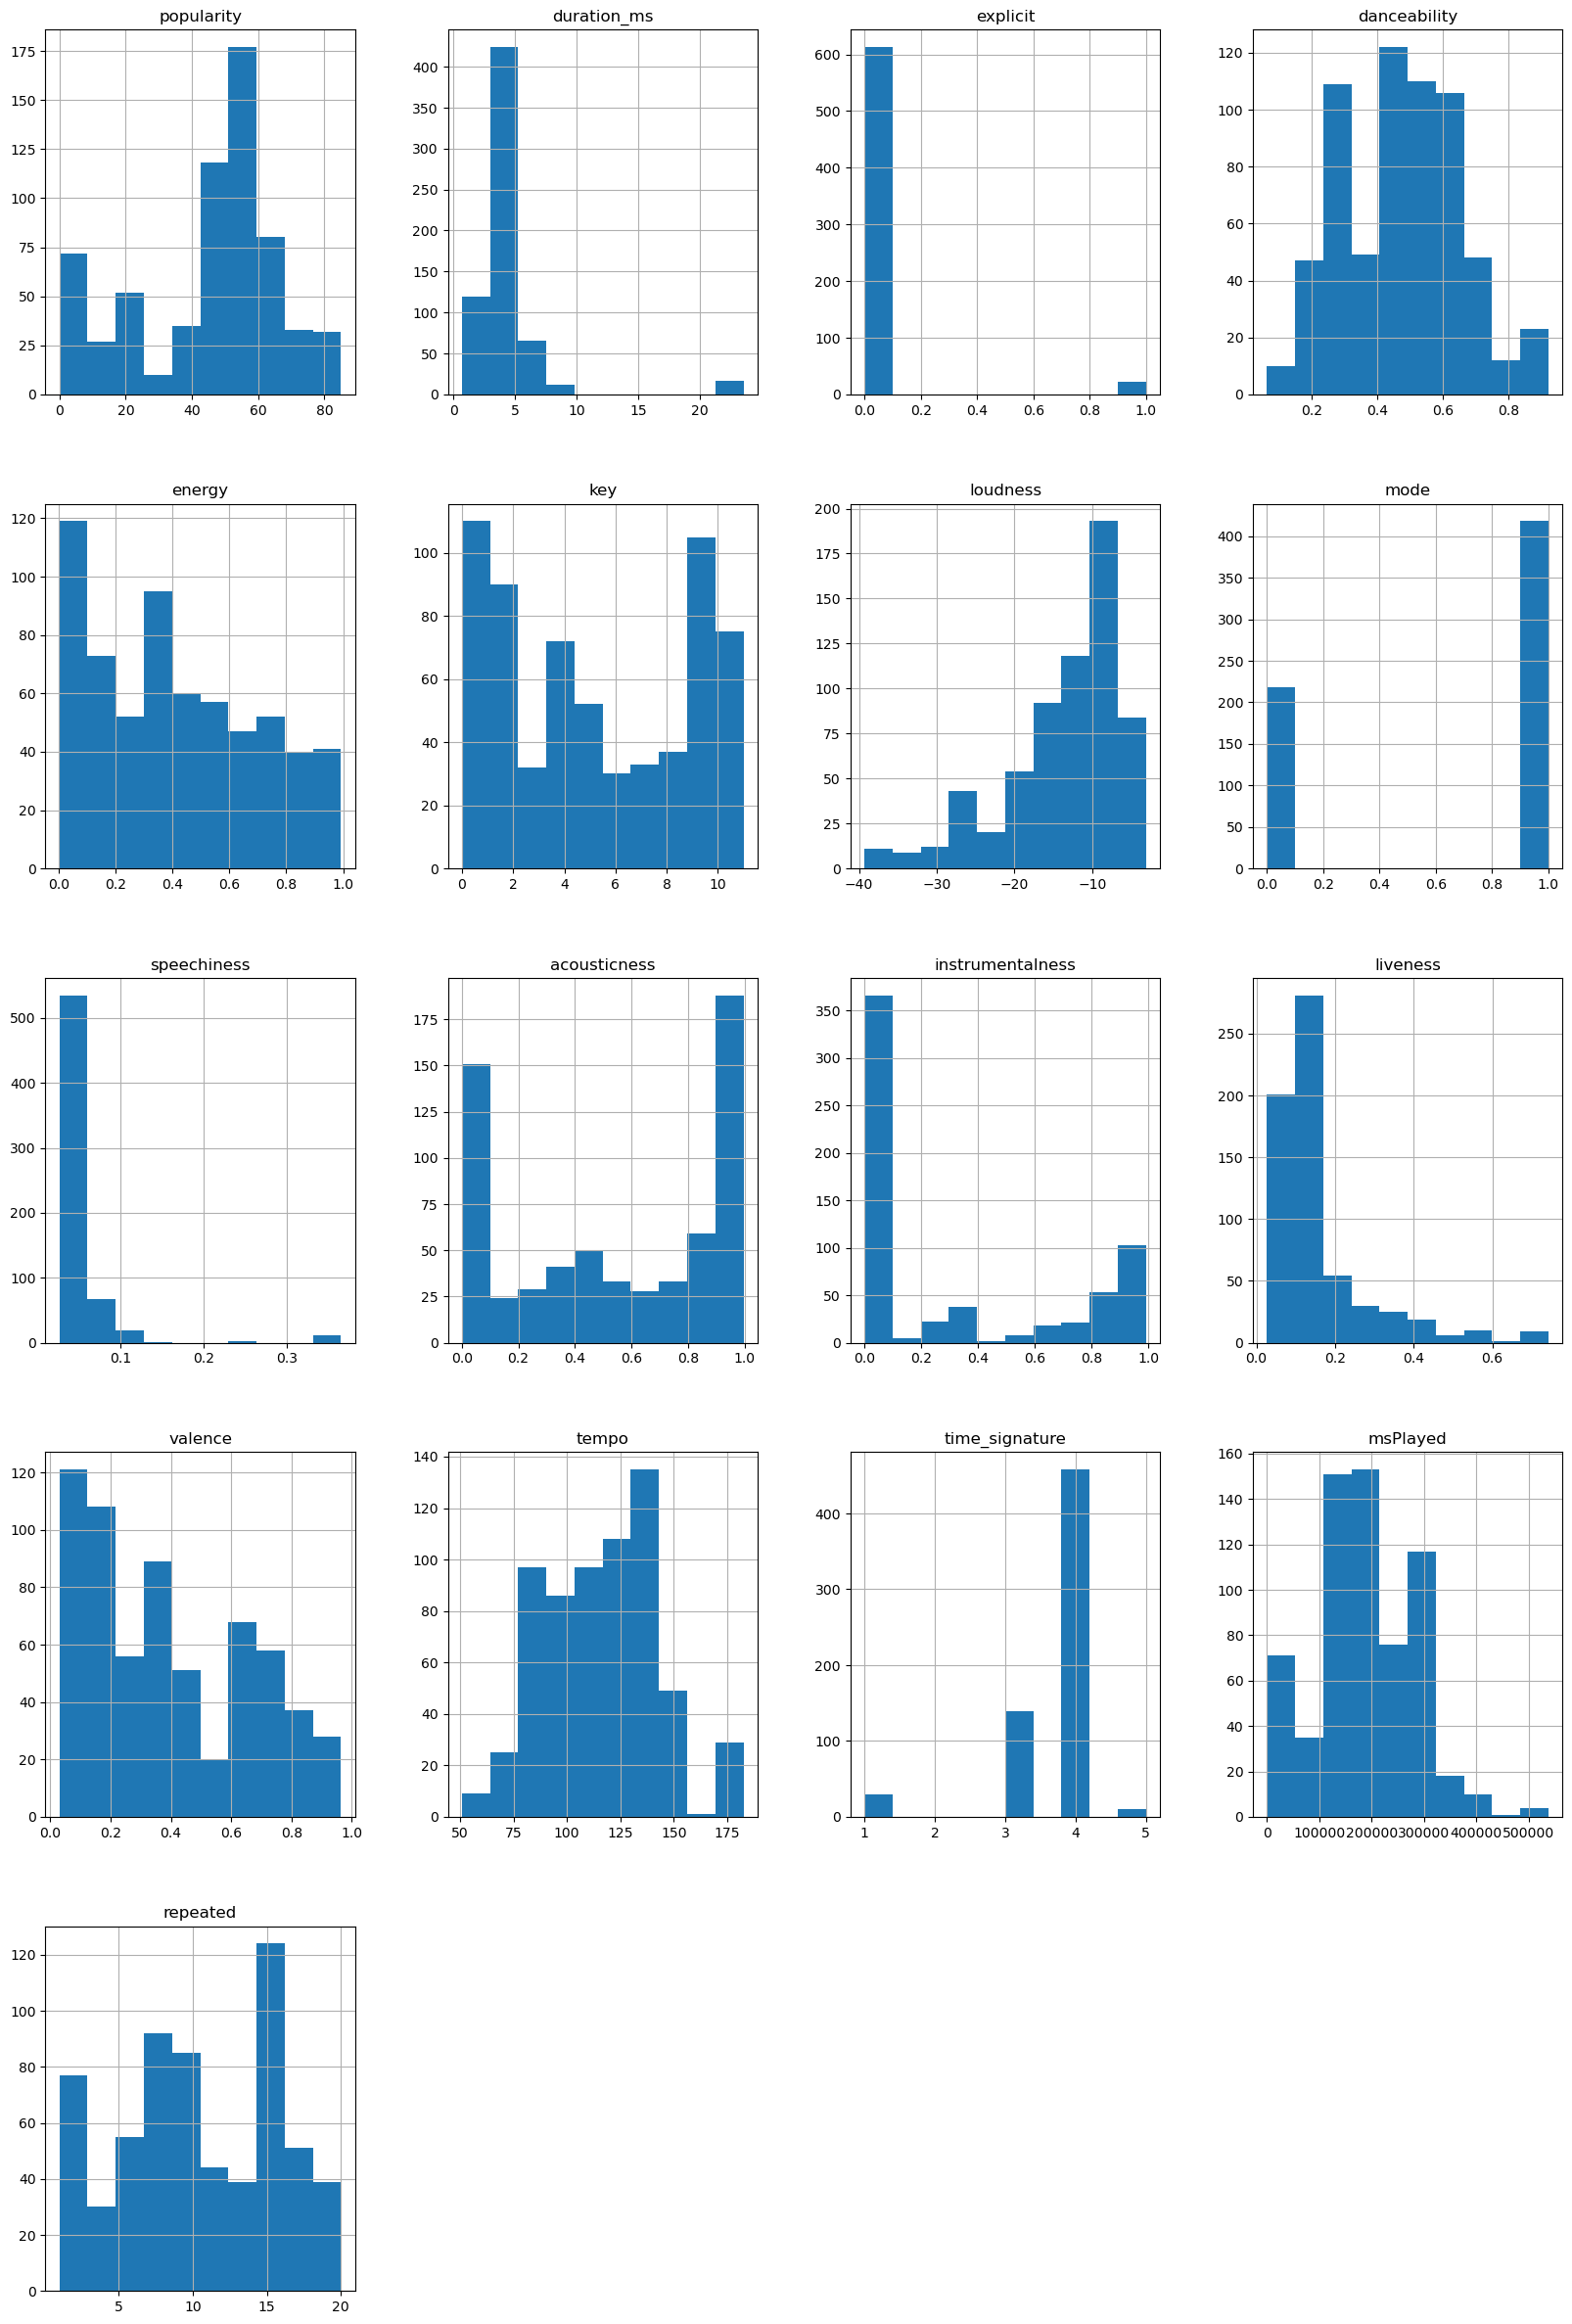

In [11]:
# Now let's check the distribution of our dataset 

numeric_data.hist(figsize=(20, 30))

conclusion :

* Low valence & liveliness 
  
* Much of them are not so noisy and chaotic (instrumentals is so low)

* Most of them are speechless music. 

* Mostly loud music 

* The time distribution of music is normal, but with some outliers.  


<AxesSubplot: >

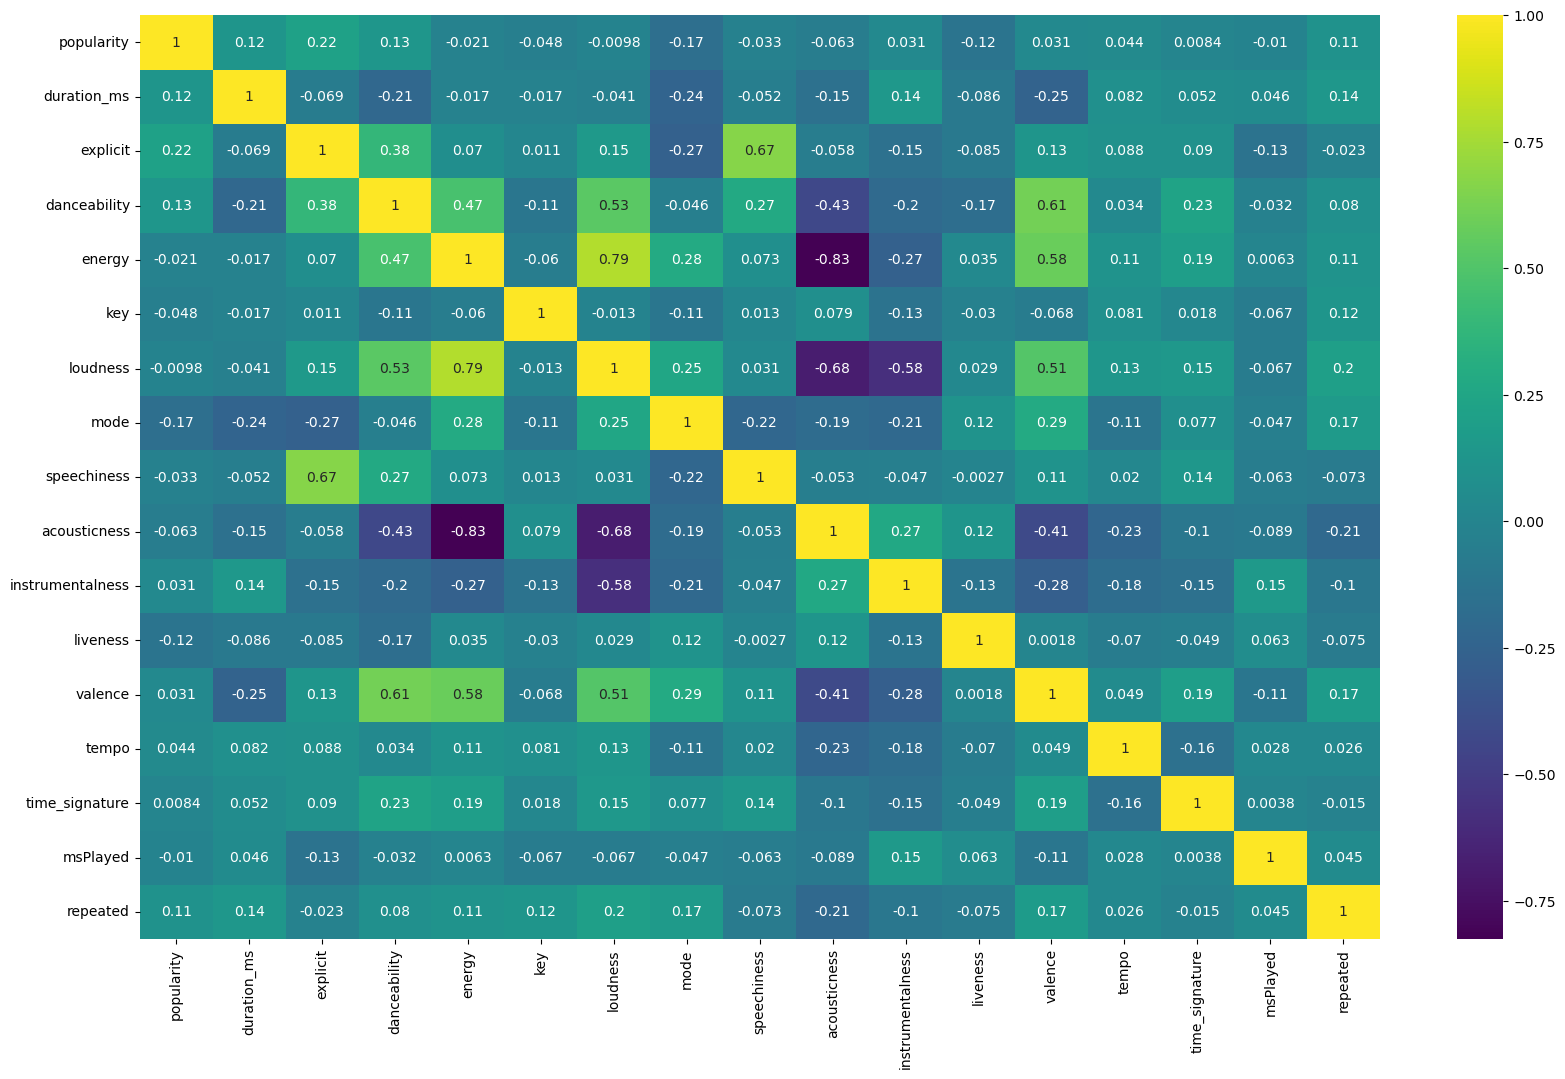

In [13]:
# Let's check for correlation between the column 

plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, cmap='viridis')


conclusion :
* Valenc, danceability, energy are highly correlated ( which is expected )
* loudness is highly correlated with energy 
* energy and loudness are are reversely correlated with acousticness  
* instrumentalness and loudness are reversely correlated 

All this conclusions are just hypotheses and does not mean anything till we can prove them with statistical analysis and have statistical significance for those hypotheses.

In the following codes we will load the dataset we have originally gotten from the spotify and has only 4 column(because that can be removed in joining) since we want to to loss no data for the analysis we want to do on our dataset. 

In [15]:

my_data = pd.read_csv('./StreamingHistory0.csv')
my_data['endTime'] = pd.to_datetime(my_data['endTime'])
my_data

,endTime,artistName,trackName,msPlayed
0,2022-03-13 06:11:00,Tigran Hamasyan,Tsirani Tsar,349386
1,2022-03-13 06:13:00,Radiohead,True Love Waits,0
2,2022-03-13 06:29:00,Johannes Brahms,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",5781
3,2022-03-14 16:45:00,owrsi | پادکست اورسی,قسمت هجدهم پادکست اورسی - نوشتن,1400160
4,2022-03-23 06:57:00,Arvo Pärt,Spiegel im Spiegel - Version for Violin and Piano,636000
...,...,...,...,...
3557,2023-03-13 23:25:00,TSU!,Prince Of Gumbay,184780
3558,2023-03-13 23:31:00,Erik Satie,Gnossiennes: No. 1. Lent,259240
3559,2023-03-13 23:34:00,Narciso Yepes,Romance Anonimo (arr. piano),182920
3560,2023-03-13 23:37:00,Henning Fuchs,Pacha Mama,167706


#### Where did I heard Musics the most? 
First let's check for the Month , day in the month and Weekday which I heard Music the most by looking at the endTime column

In [16]:
import calendar
import pandas as pd
import plotly.express as px

# Convert the month integers to string representations of month names
month_names = pd.Series(my_data['endTime'].dt.month).apply(
    lambda x: calendar.month_name[x])

# Create a histogram using Plotly Express
fig = px.histogram(x=month_names, nbins=12,color_discrete_sequence=px.colors.qualitative.G10_r)

# Update the x-axis labels
fig.update_layout(xaxis={'tickmode': 'array',
                         'tickvals': list(range(0, 12)),
                         'ticktext': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                         'title': 'Month',
                         'tickfont': {'size': 16}}, height=900)

# Show the plot
fig.show()


In [17]:
# Create a histogram using Plotly Express
import plotly.express as px
fig = px.histogram(x=my_data['endTime'].dt.day, nbins=31,
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Update the x-axis labels
fig.update_layout(xaxis={'title': 'Day of Month',
                  'tickmode': 'linear', 'dtick': 1,'tickfont': {'size': 16}}, bargap=0.1,
    height=900)


# Show the plot
fig.show()


In [20]:
import calendar
import pandas as pd
import plotly.express as px

# Convert the weekday integers to string representations of weekday names
weekday_names = pd.Series(my_data['endTime'].dt.weekday).apply(
    lambda x: calendar.day_name[x])

# Create a histogram using Plotly Express
fig = px.histogram(x=weekday_names, nbins=7,color_discrete_sequence=px.colors.qualitative.Pastel1)

# Update the x-axis labels
fig.update_layout(xaxis={'title': 'Week Day','tickmode': 'array',
                         'tickvals': list(range(7)),
                         'ticktext': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],'tickfont': {'size': 16}}, height=700)

# Show the plot
fig.show()


In [18]:
# Group the DataFrame by trackName and count the number of occurrences
counts = my_data.groupby('trackName').size().reset_index(name='repeated')

counts = counts.sort_values('repeated', ascending=False)


Conclusion: 

* The Jan & Feb  are the music month for me!

* We had Two peaks in the Days one in the begin and end of month 

* Thur and Sat was significantly different from other weekdays

In [143]:
import requests
import base64
import config.py as config

# Set up the authentication parameters
client_id = config.client_id
client_secret = config.client_secret
redirect_uri = 'http://localhost:8000/callback'
auth_url = 'https://accounts.spotify.com/api/token'

# Encode the client ID and client secret as base64
auth_header = base64.b64encode((client_id + ':' + client_secret).encode('ascii')).decode('ascii')

# Make the authentication request
response = requests.post(auth_url, data={'grant_type': 'client_credentials'}, headers={'Authorization': 'Basic ' + auth_header})

# Parse the response JSON
data_from_spotify = response.json()

# Extract the access token
access_token = data_from_spotify['access_token']


In [ ]:
access_token

In [145]:
counts_list = list((counts.trackName))
len(counts_list)

762

In [146]:
import requests
import pandas as pd

# Set up the API endpoint URL
url = 'https://api.spotify.com/v1/search'

# Set up the request headers, including the access token
headers = {'Authorization': f'Bearer {access_token}'}

# Create an empty DataFrame to store the output
df = pd.DataFrame(columns=['artist', 'track', 'release_date'])

# Loop through the first 30 search results
for i in counts.trackName:

    # Set up the search query as the track name
    query = str(i)

    # Set up the request parameters
    params = {'q': query, 'type': 'track'}

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Parse the response JSON
    data = response.json()

    # Extract the first search result
    result = data['tracks']['items'][0]

    # Extract the artist name, track name, release date, external URL, and genre(s)
    artist = result['artists'][0]['name']
    track = result['name']
    release_date = result['album']['release_date']

    # Append the output to the DataFrame
    df = df.append({'artist': artist, 'track': track, 'release_date': release_date}, ignore_index=True)

# Print the DataFrame
print(df)


                     artist                                             track  \
0                Mazzy Star                                    Taste Of Blood   
1                 Master KG                 Jerusalema (feat. Nomcebo Zikode)   
2         Peppino Gagliardi                       La ballata dell'uomo in piu   
3    George Frideric Handel              Rinaldo / Act 2: Lascia ch'io pianga   
4                    Says'z                                       DIS-MOI OUI   
..                      ...                                               ...   
757                 Cris Mj                                  Marisola - Remix   
758         Antonio Vivaldi  Mandolin Concerto in C Major, RV 425: I. Allegro   
759            Darya Dadvar                                      Mah Pishanoo   
760           Claudio Gizzi                        Luna silenziosa in A Minor   
761                    달콤한꿈                                      꽃날 (황진이 OST)   

    release_date  
0     19

In [11]:
repeated_ = counts['repeated'].reset_index(drop=True)

In [ ]:
df2 = pd.concat([df, repeated_], axis=1)
df2.artist[0] = "Archive"
df2.track[1] = "Jerusalem"
df2.artist[1] = "Anúna"
df2 = df2.reindex(columns=['track', 'artist', 'release_date', 'repeated'])
df2.head(30)

In [ ]:
# Save the DataFrame to a CSV file
df2.to_csv('some_aspect_of_my_data.csv', index=False)

In [22]:
df2 = pd.read_csv("some_aspect_of_my_data.csv")

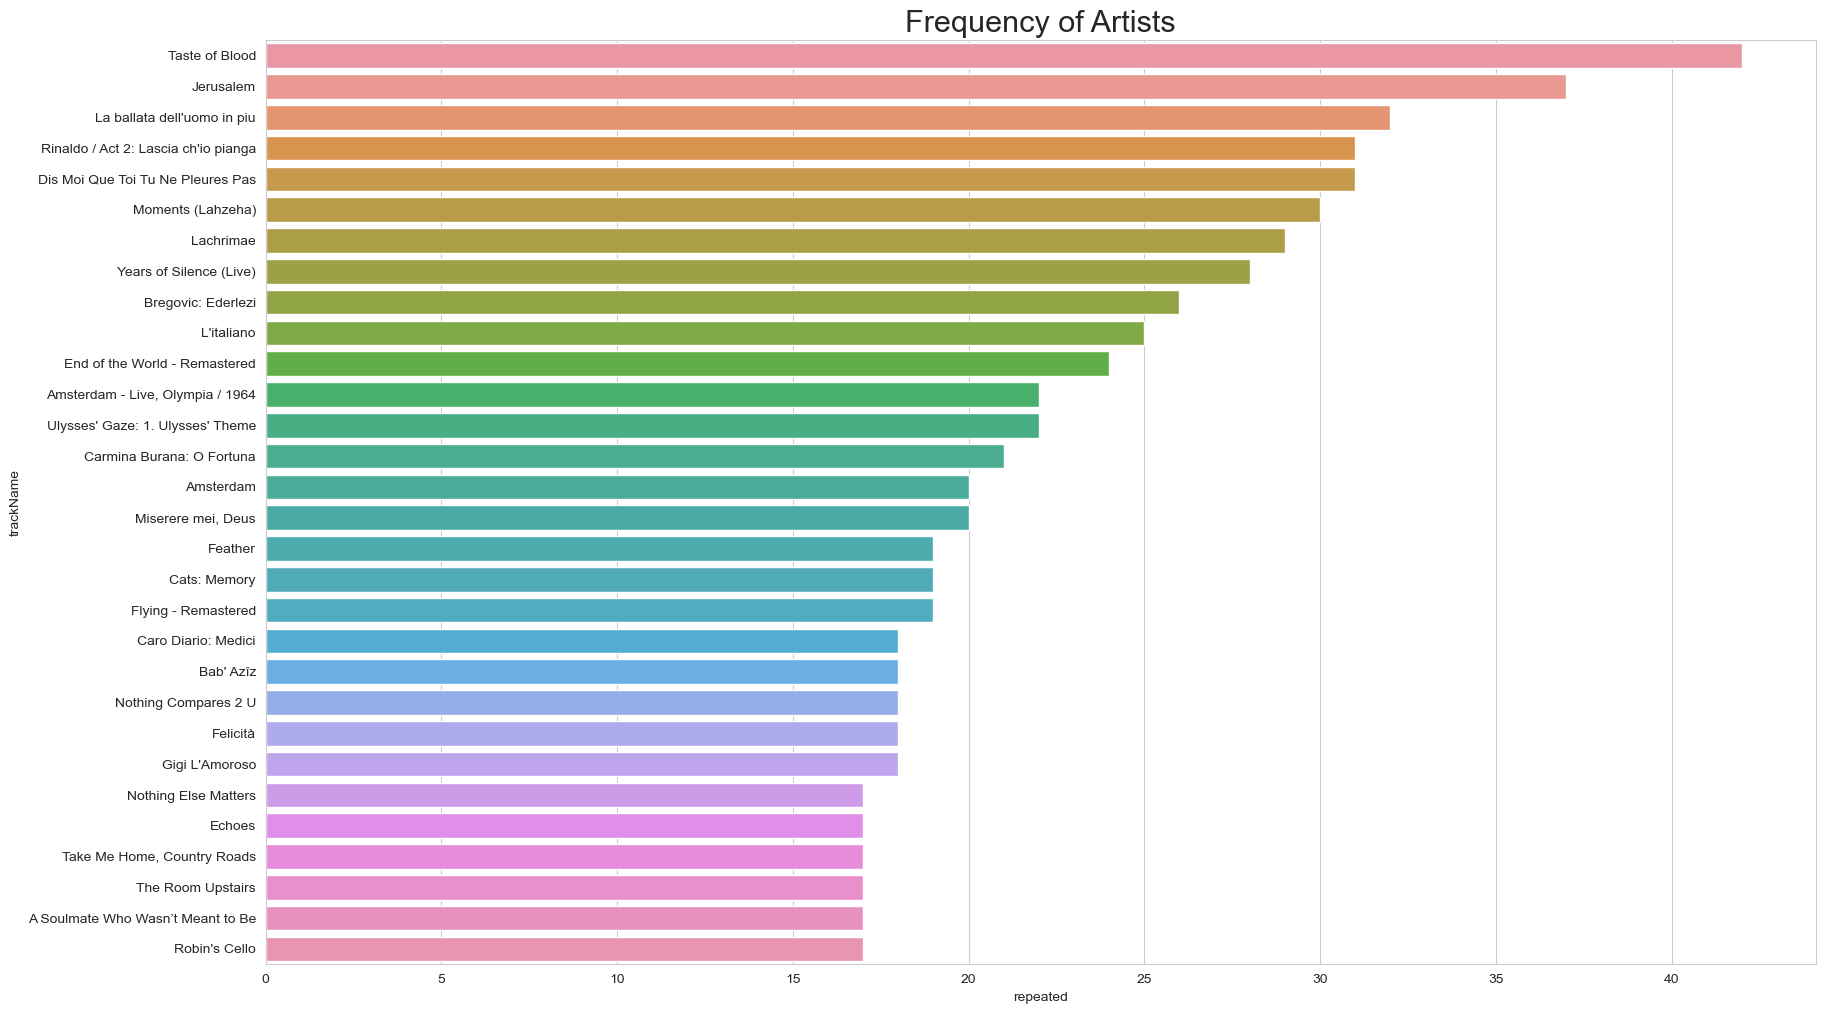

In [25]:
### Let's check for the top 30 music :
plt.figure(figsize=(20, 12))
fig = sns.barplot(counts[:30], y='trackName', x='repeated')
plot.set_xticklabels(plot.get_xticklabels(), fontsize='x-large')
plot.set_yticklabels(plot.get_yticklabels(), fontsize='x-large')
plt.title('Frequency of Artists',fontsize=22)
plt.show()


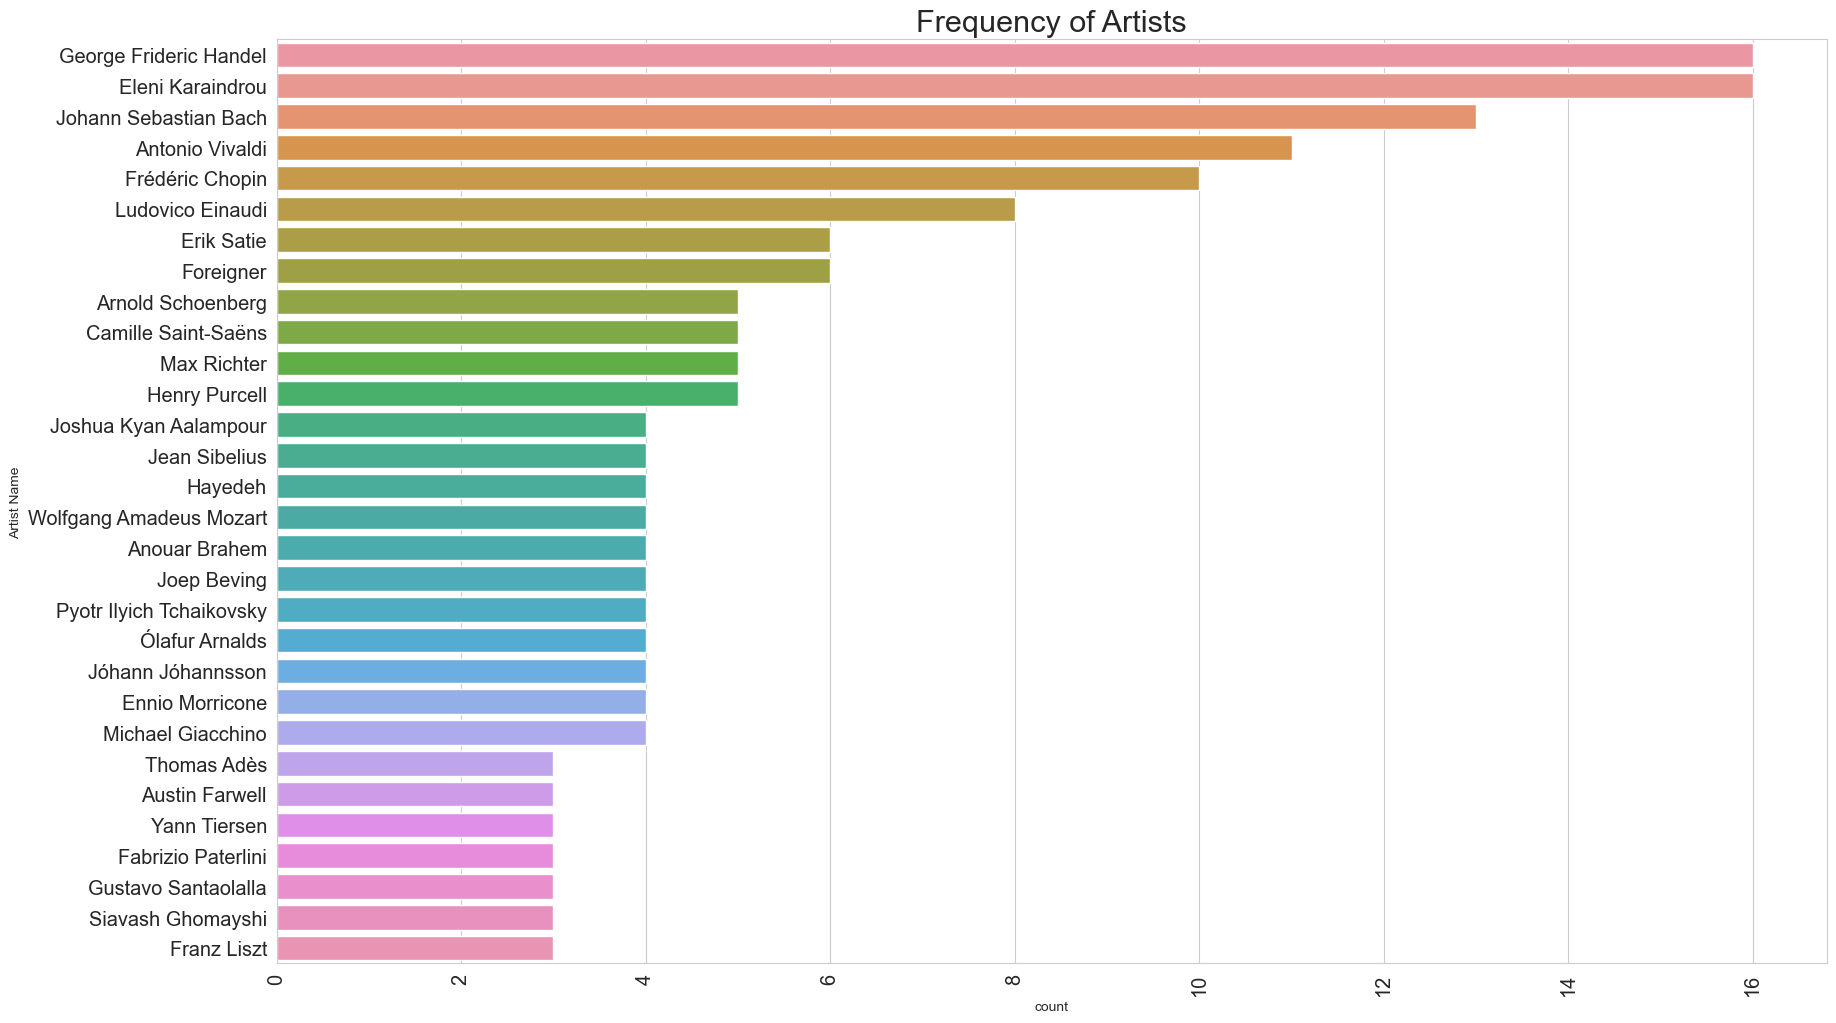

In [24]:
## Now Let's check for the top 30 artist 
top_artists = df2['artist'].value_counts().head(30)
plt.figure(figsize=(20, 12))
sns.set_style('whitegrid')
plot = sns.barplot(y=top_artists.index, x=top_artists.values)
plt.xticks(rotation=90)
plt.xlabel('count')
plt.ylabel('Artist Name')
plot.set_xticklabels(plot.get_xticklabels(), fontsize='x-large')
plot.set_yticklabels(plot.get_yticklabels(), fontsize='x-large')
plt.title('Frequency of Artists',fontsize=22)
plt.show()


In [180]:
import plotly.express as px

# Create a histogram of release dates
fig = px.histogram(df2, x='release_date')

# Update the layout of the chart
fig.update_layout(
    title='Distribution of Release Dates of my Musics',
    xaxis={'title': 'Release Date',
                  'tickmode': 'linear', 'dtick': 1,'tickfont': {'size': 16}},
    yaxis_title='Count',
    font=dict(size=16),
    height=600,
    margin=dict(l=40, r=20, t=80, b=20),
    plot_bgcolor='#F7F7FF', bargap=0.1
)

# Show the chart
fig.show()

In [ ]:
fig.update_layout(xaxis={'title': 'Day of Month',
                  'tickmode': 'linear', 'dtick': 1,'tickfont': {'size': 16}}, bargap=0.1,
    height=900)

In [158]:
from plotly.subplots import make_subplots
plt.figure(figsize=(12, 6))
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms']
rows = 2
cols = 5
fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=features)
x, y = np.meshgrid(np.arange(rows)+1, np.arange(cols)+1)
count = 0
for row, col in zip(x.T.reshape(-1), y.T.reshape(-1)):
    fig.add_trace(
        go.Histogram(x=data[features[count]].values),
        row=row,
        col=col
    )
    count += 1

fig.update_layout(height=900, width=900,
                  title_text='Feature Distribution', showlegend=False)
fig.show()


<Figure size 1200x600 with 0 Axes>

In [159]:
colors = px.colors.qualitative.Plotly

for i, feature in enumerate(features):
    fig = px.histogram(data, x=feature, nbins=30, opacity=0.7,
                       color_discrete_sequence=[colors[i % len(colors)]])

    fig.update_layout(title_text=f"{feature.capitalize()} Distribution",
                      height=600)  # Set the height of the plot

    fig.show()

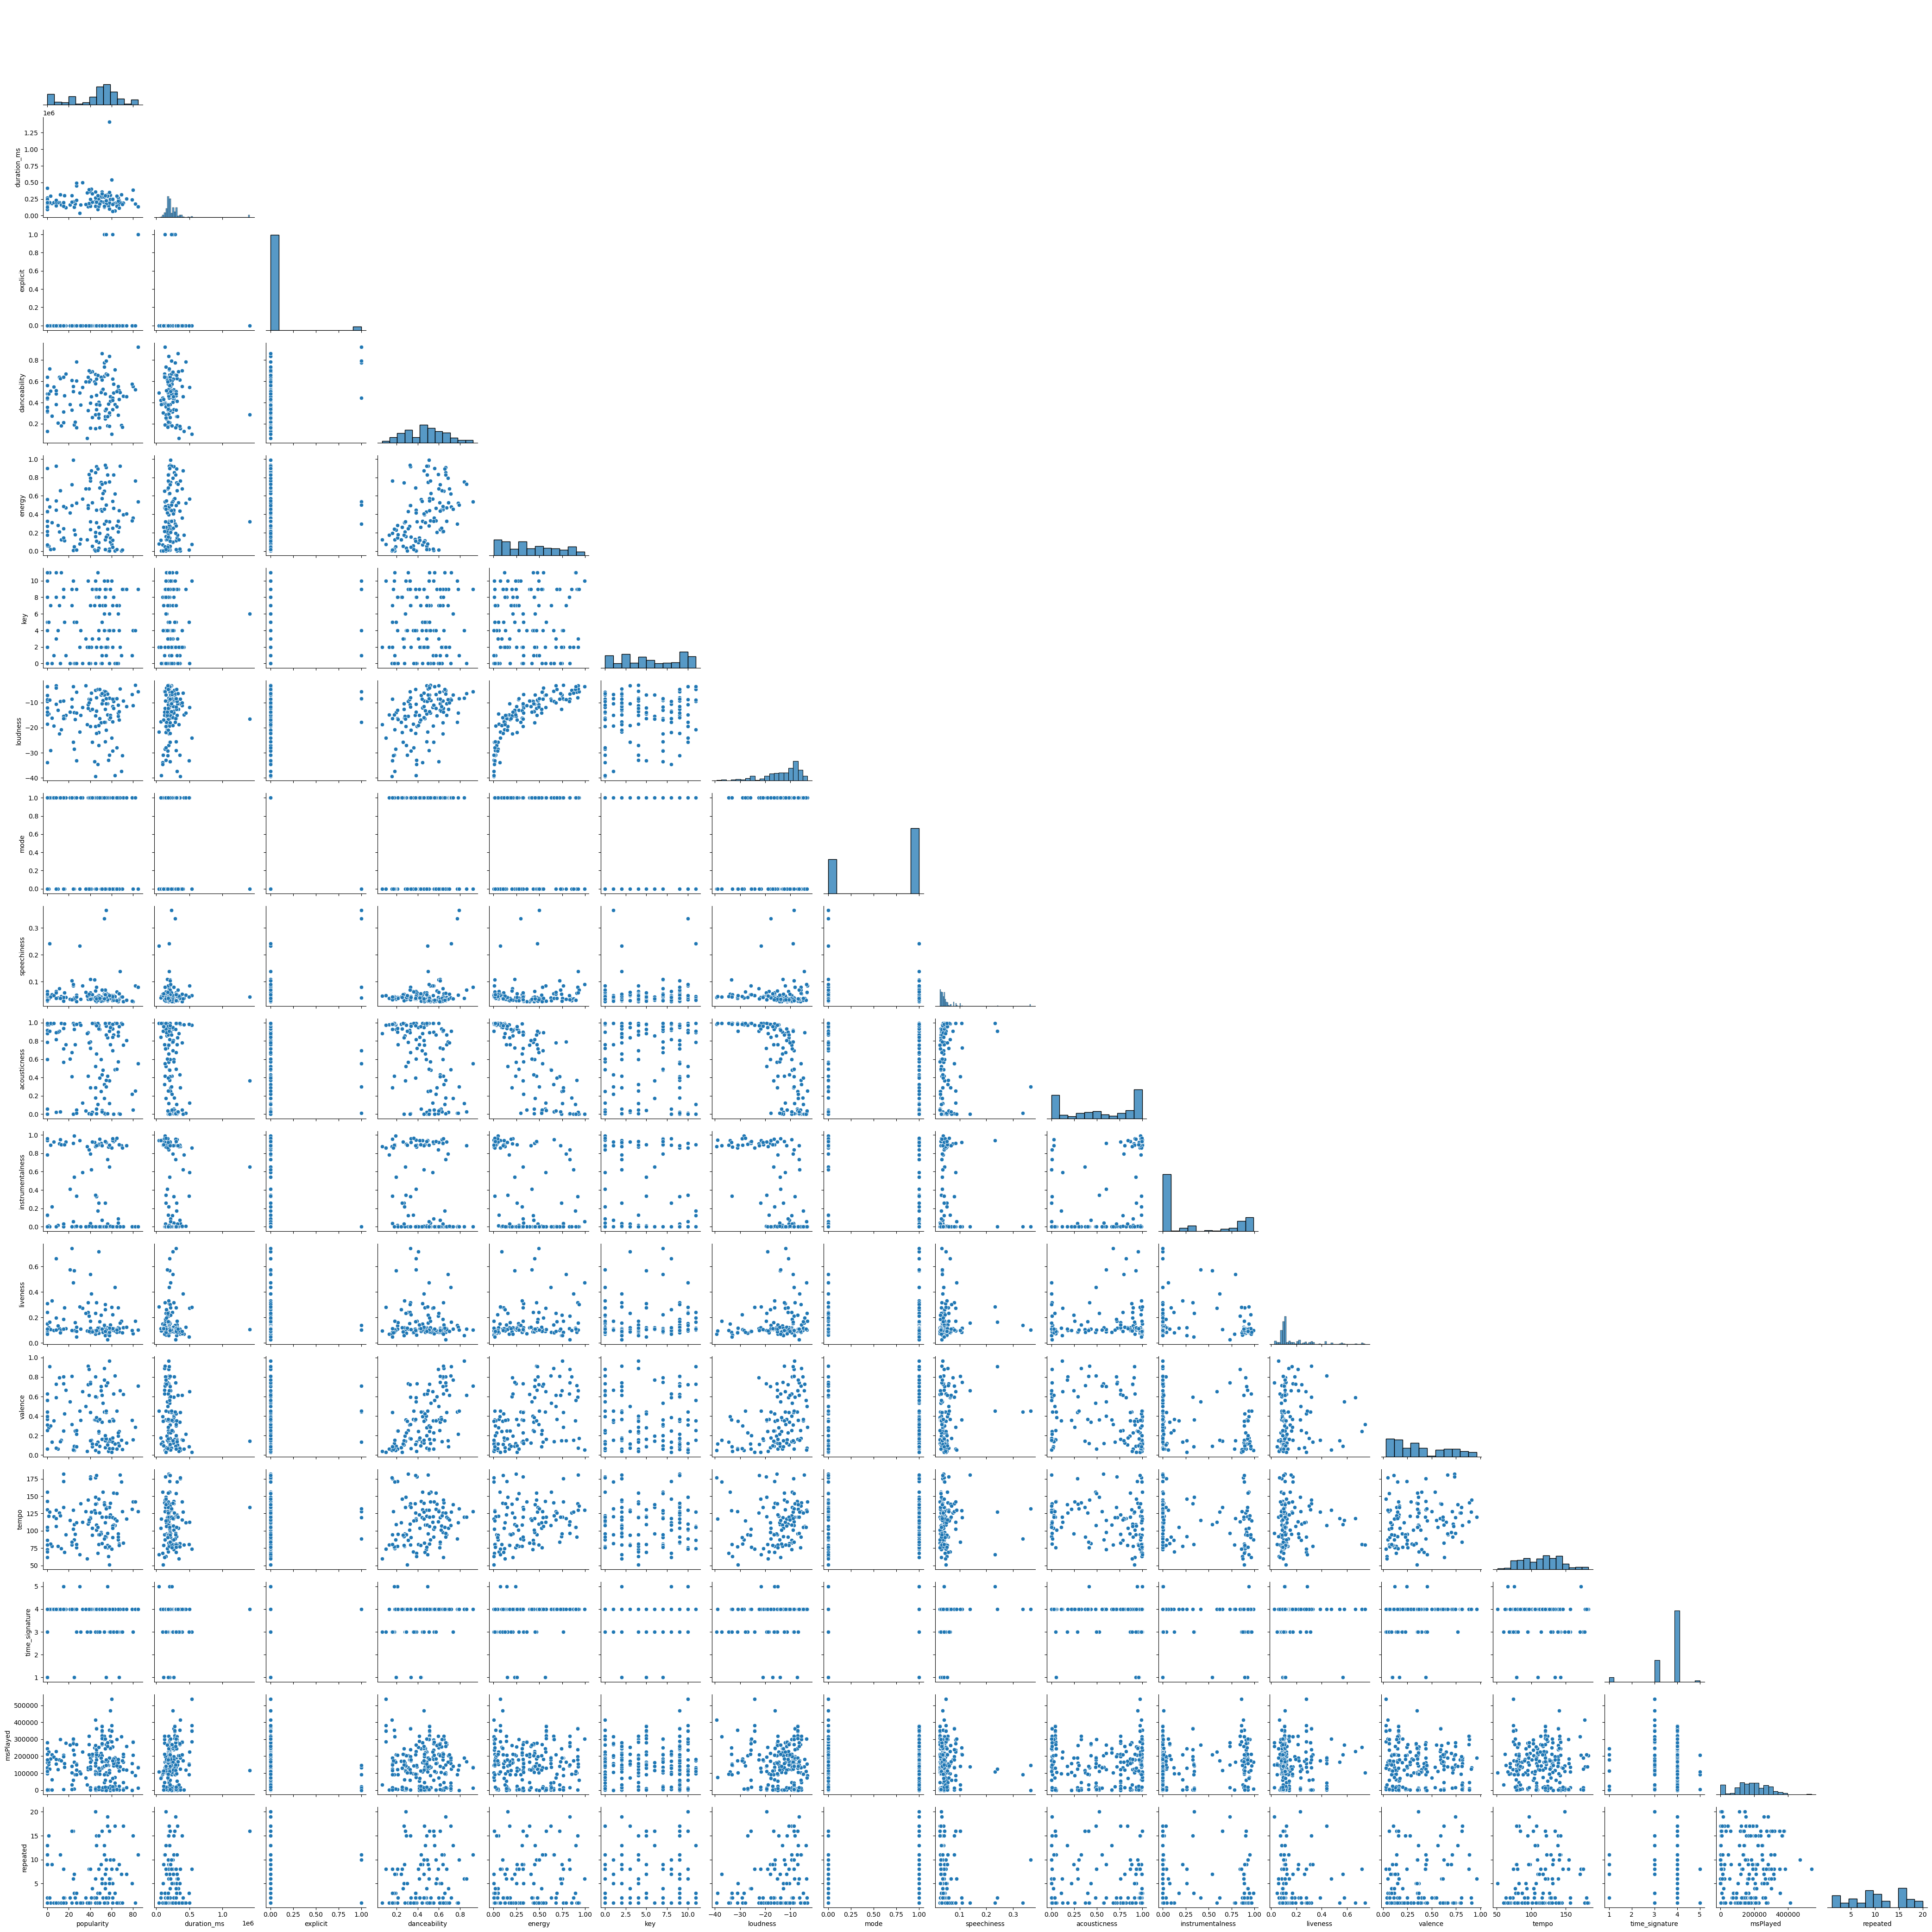

In [28]:
sns.pairplot(numeric_data, corner=True)


In [19]:
data.lyrics

0      \r\n\r\nUn p'tit bout de ta peau coincé entre ...
1      \r\n\r\nUn p'tit bout de ta peau coincé entre ...
2      \r\n\r\nUn p'tit bout de ta peau coincé entre ...
3      \r\n\r\nUn p'tit bout de ta peau coincé entre ...
4      \r\n\r\nUn p'tit bout de ta peau coincé entre ...
                             ...                        
631                                                  -99
632                                                  -99
633                                                  -99
634                                                  -99
635                                                  -99
Name: lyrics, Length: 636, dtype: object

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# download necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# initialize tokenizer, stop words, and lemmatizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    # convert text to lowercase
    text = text.lower()

    # remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # tokenize text
    tokens = tokenizer.tokenize(text)

    # remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    # lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # join tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


[nltk_data] Downloading package punkt to /Users/amirzar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirzar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amirzar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# apply the clean_text() function to the text_col column
import nltk
nltk.download('omw-1.4')
data['lyrics'] = data['lyrics'].apply(clean_text)


[nltk_data] Downloading package omw-1.4 to /Users/amirzar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
data['lyrics']


0      un ptit bout de ta peau coinc entre me dent ji...
1      un ptit bout de ta peau coinc entre me dent ji...
2      un ptit bout de ta peau coinc entre me dent ji...
3      un ptit bout de ta peau coinc entre me dent ji...
4      un ptit bout de ta peau coinc entre me dent ji...
                             ...                        
631                                                     
632                                                     
633                                                     
634                                                     
635                                                     
Name: lyrics, Length: 636, dtype: object

In [23]:
data['lyrics']

0      un ptit bout de ta peau coinc entre me dent ji...
1      un ptit bout de ta peau coinc entre me dent ji...
2      un ptit bout de ta peau coinc entre me dent ji...
3      un ptit bout de ta peau coinc entre me dent ji...
4      un ptit bout de ta peau coinc entre me dent ji...
                             ...                        
631                                                     
632                                                     
633                                                     
634                                                     
635                                                     
Name: lyrics, Length: 636, dtype: object

In [24]:
from collections import Counter

# concatenate the text in the text_col column into a single string
text = ' '.join(data['lyrics'].tolist())

# split the text into individual words using the split() method
words = text.split()

# count the occurrences of each word using the Counter() method
word_counts = Counter(words)

# print the top 10 most common words
print(word_counts.most_common(30))

[('im', 1261), ('la', 883), ('know', 650), ('de', 586), ('love', 563), ('e', 491), ('que', 469), ('stay', 418), ('want', 396), ('oh', 392), ('non', 371), ('te', 352), ('che', 344), ('go', 343), ('vrit', 320), ('said', 311), ('wanna', 302), ('dont', 291), ('like', 284), ('le', 275), ('yeah', 270), ('nothing', 270), ('one', 269), ('di', 253), ('un', 229), ('il', 220), ('feel', 219), ('ton', 214), ('heart', 197), ('see', 197)]


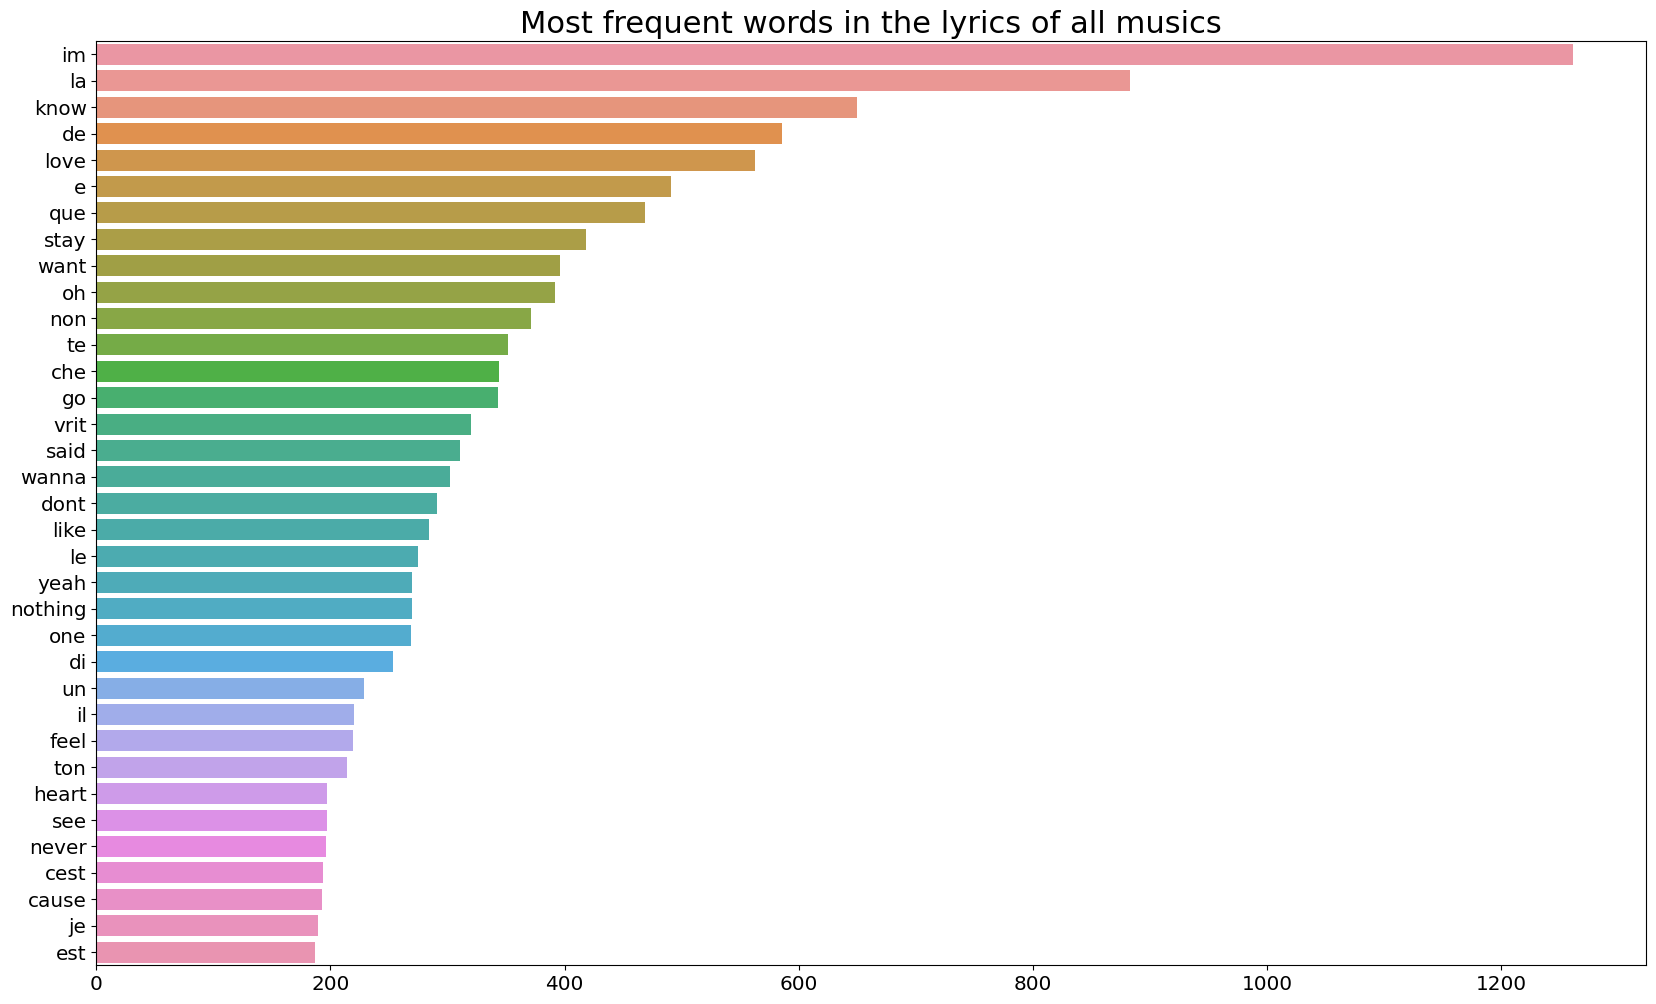

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

var = word_counts.most_common(35)

plt.figure(figsize=(20, 12))
plt.title(f'Most frequent words in the lyrics of all musics', fontsize=22)

# extract the words and counts from the var list of tuples using the zip() function
words, counts = zip(*var)

plot = sns.barplot(x=list(counts), y=list(words))
plot.set_xticklabels(plot.get_xticklabels(), fontsize='x-large')
plot.set_yticklabels(plot.get_yticklabels(), fontsize='x-large')

plt.show()


In [73]:
data.genres

0                                               ['']
1                                               ['']
2                                               ['']
3                                               ['']
4                                               ['']
                           ...                      
631    ['electropop', 'indie psych-rock', 'preverb']
632    ['electropop', 'indie psych-rock', 'preverb']
633    ['electropop', 'indie psych-rock', 'preverb']
634    ['electropop', 'indie psych-rock', 'preverb']
635    ['electropop', 'indie psych-rock', 'preverb']
Name: genres, Length: 636, dtype: object

In [92]:
data.replace("['']", 'null', inplace=True)

data['genres'] = data['genres'].str.replace("[\[\]]", "", regex=True)
data['genres']


0                                     null
1                                     null
2                                     null
3                                     null
4                                     null
                      ...                 
631    electropop indie psych-rock preverb
632    electropop indie psych-rock preverb
633    electropop indie psych-rock preverb
634    electropop indie psych-rock preverb
635    electropop indie psych-rock preverb
Name: genres, Length: 636, dtype: object

In [93]:
# concatenate the text in the text_col column into a single string
text = ' '.join(data['genres'].tolist())

# split the text into individual words using the split() method
words = text.split()

# count the occurrences of each word using the Counter() method
word_counts = Counter(words)

# print the top 10 most common words
print(word_counts.most_common(30))


[('pop', 281), ('null', 208), ('rock', 134), ('indie', 131), ('house', 88), ('room', 78), ('folk', 67), ('italian', 59), ('soundtrack', 56), ('modern', 49), ('big', 48), ('electro', 48), ('folk-pop', 42), ('new', 37), ('stomp', 37), ('and', 37), ('holler', 37), ('edm', 36), ('alternative', 36), ('chamber', 34), ('focus', 34), ('classic', 33), ('ambient', 32), ('blues', 32), ('atmosphere', 31), ('compositional', 30), ('deep', 29), ('americana', 27), ('jazz', 24), ('latin', 24)]


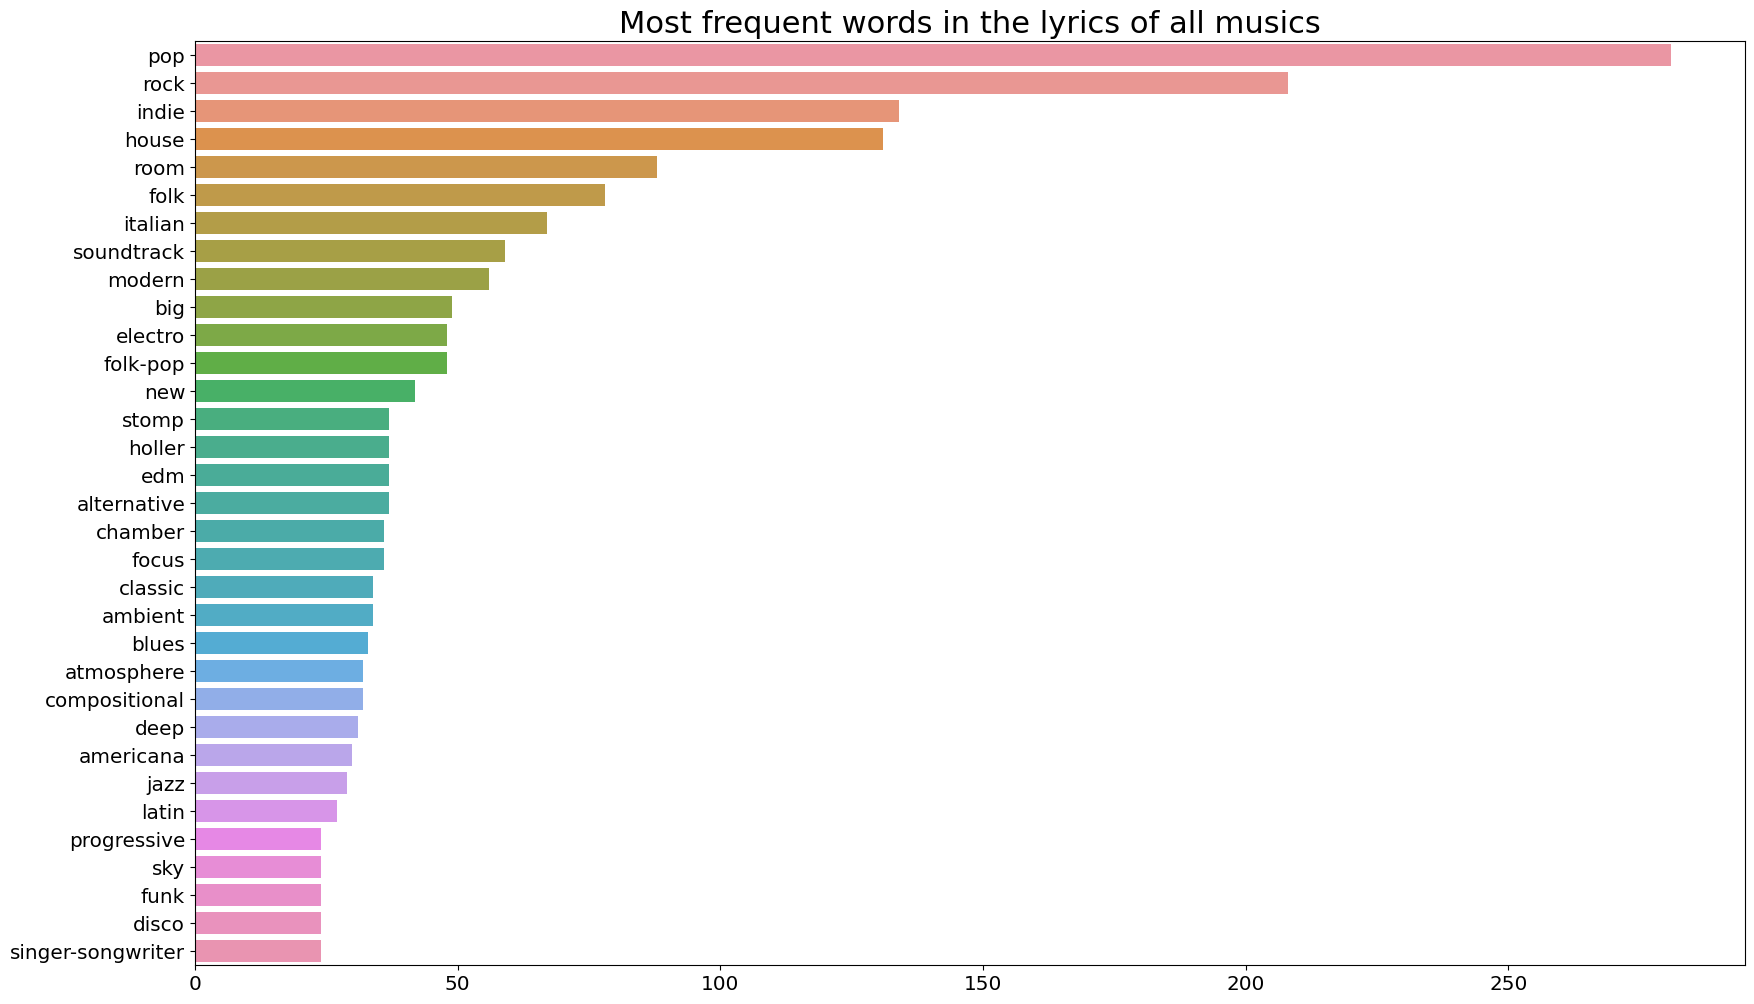

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

var = word_counts.most_common(35)

plt.figure(figsize=(20, 12))
plt.title(f'Most frequent words in the lyrics of all musics', fontsize=22)

# extract the words and counts from the var list of tuples using the zip() function
words = [word for word in words if word not in ['null', 'and']]
counts = [count for count, word in zip(counts, words) if word not in ['and']]

plot = sns.barplot(x=list(counts), y=list(words))
plot.set_xticklabels(plot.get_xticklabels(), fontsize='x-large')
plot.set_yticklabels(plot.get_yticklabels(), fontsize='x-large')

plt.show()


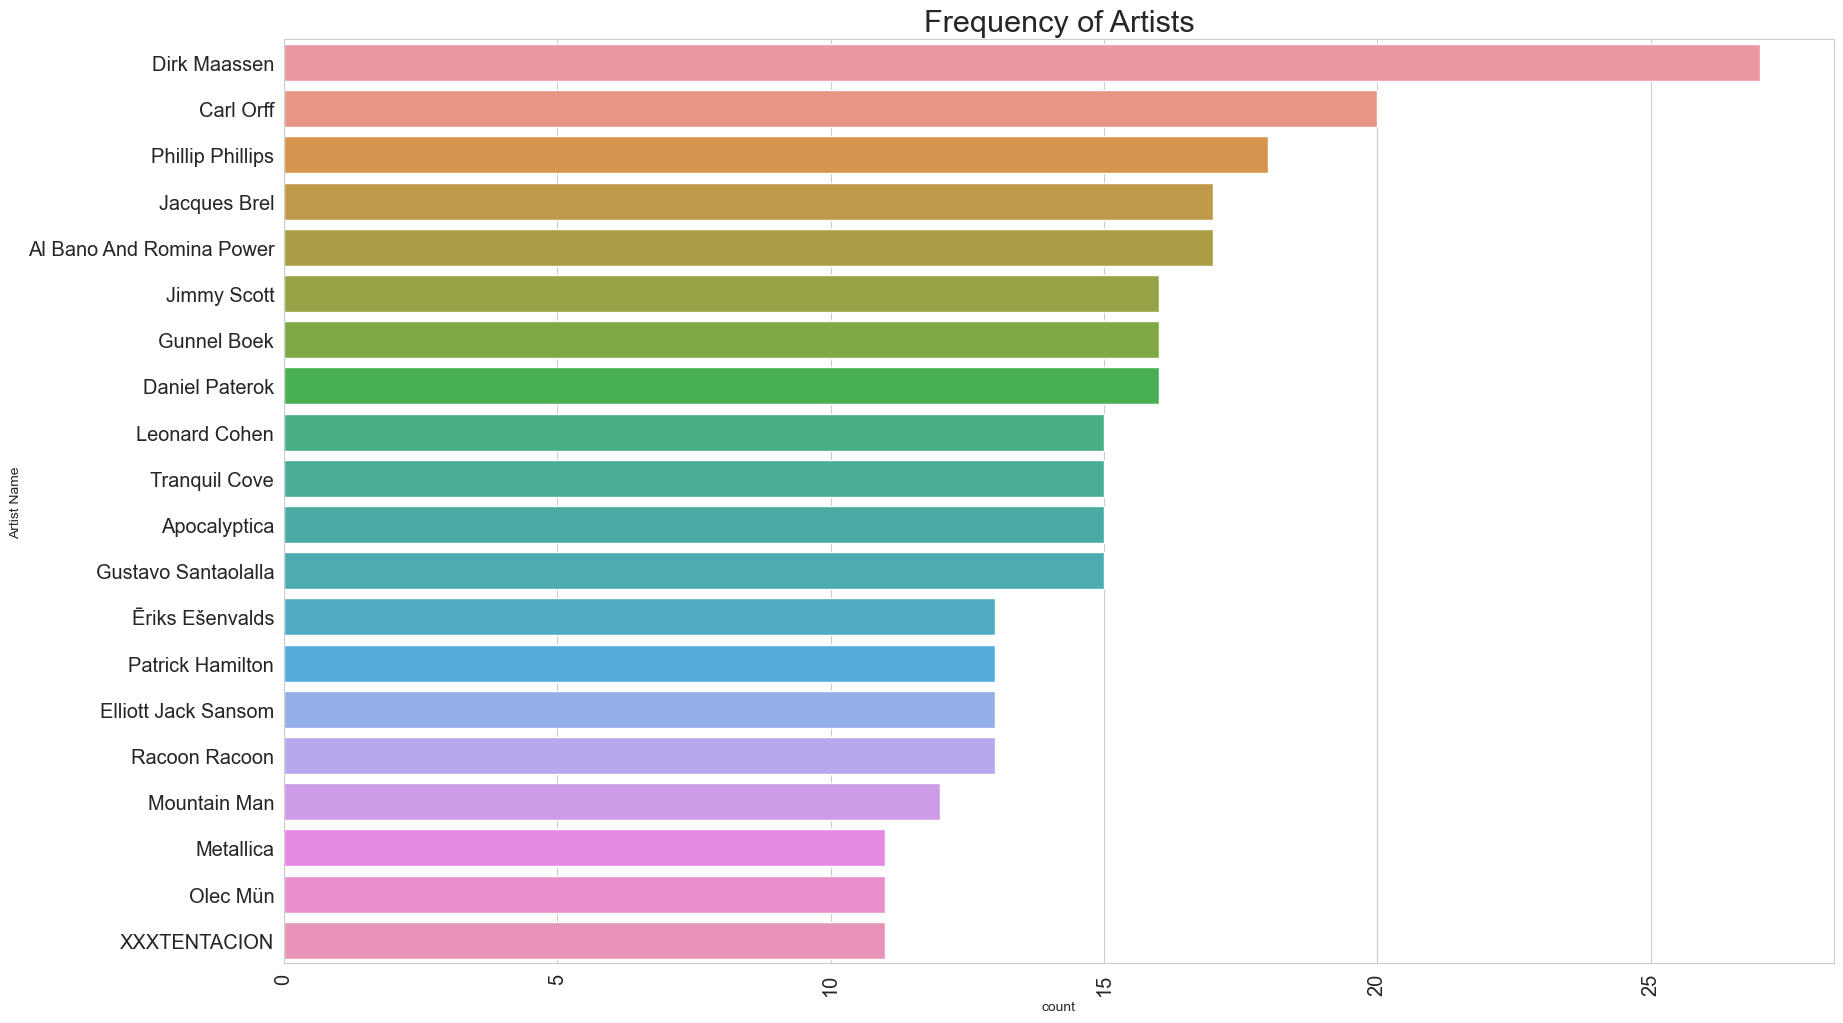

In [119]:
data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'genres', 'uri',
       'lyrics', 'artists_name_x', 'endTime', 'artists_name_y', 'msPlayed'],
      dtype='object')

In [125]:
data['endTime'] = pd.to_datetime(data['endTime'])

In [128]:
data['endTime']

0     2022-04-05 08:51:00
1     2022-04-11 09:39:00
2     2022-04-17 09:49:00
3     2022-04-21 10:38:00
4     2022-04-27 11:32:00
              ...        
631   2022-04-24 09:16:00
632   2022-05-20 14:37:00
633   2022-06-04 12:31:00
634   2022-10-27 13:55:00
635   2023-02-27 17:40:00
Name: endTime, Length: 636, dtype: datetime64[ns]

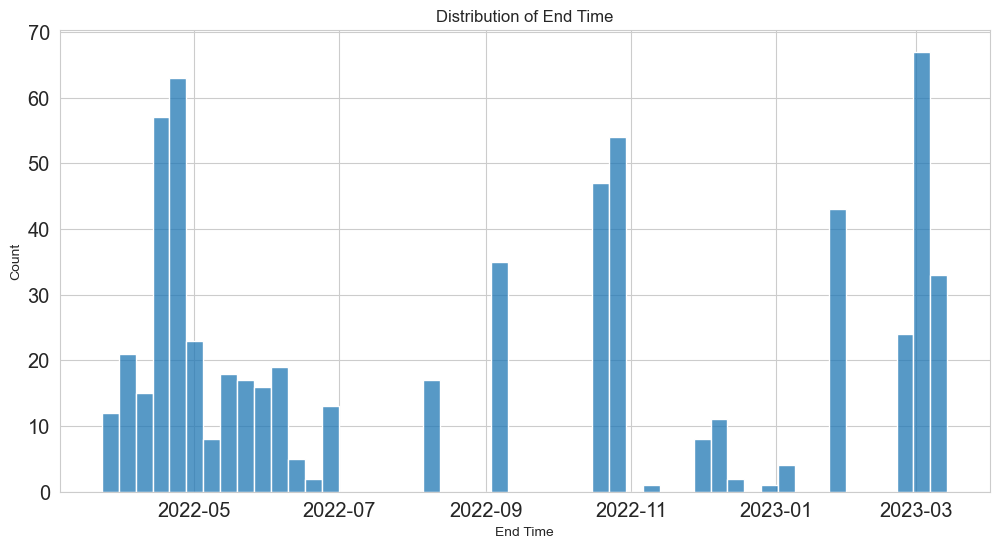

In [134]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
plot = sns.histplot(data=data, x='endTime', bins=50)
plot.set_xticklabels(plot.get_xticklabels(), fontsize='x-large')
plot.set_yticklabels(plot.get_yticklabels(), fontsize='x-large')
plt.xlabel('End Time')
plt.ylabel('Count')
plt.title('Distribution of End Time')
plt.show()



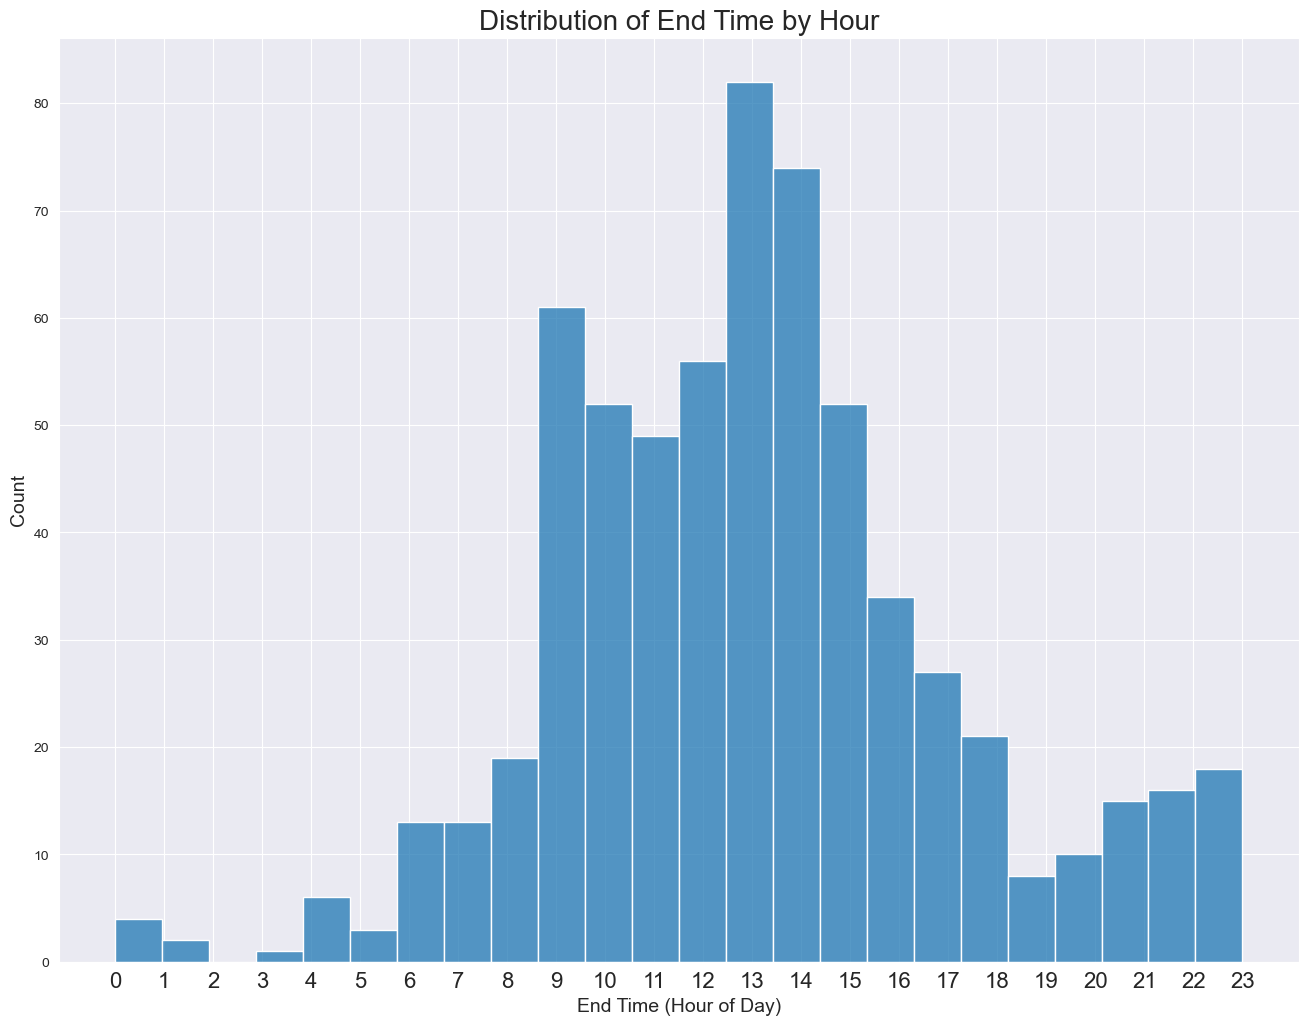

In [143]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,12))
sns.histplot(data=data['endTime'].dt.hour, bins=24)
plt.xlabel('End Time (Hour of Day)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of End Time by Hour', fontsize=20)
plt.xticks( fontsize=16)
plt.xticks(range(24))
plt.show()